In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
booking=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")

In [4]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [5]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
ss=['children','country']
booking1=booking.dropna(subset=ss)

In [8]:
booking1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

In [9]:
booking1.loc[booking1.agent.isnull(), 'agent'] = 999 
booking1.loc[booking1.company.isnull(), 'company'] = 999 
booking1.loc[booking1.meal.isnull(), 'meal'] = 'SC'

C:\Users\sriya\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
booking1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [11]:
booking1 = booking1[booking1.adr > 0]

In [12]:
booking1=booking1.drop(['hotel','reservation_status_date'],axis=1)

In [13]:
cleaned = booking1.copy()

columns = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr',
]

for col in columns:
    q1 = booking1[col].quantile(0.25)
    q3 = booking1[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    print(f'Lower point: {round(lower, 2)} \t upper point: {round(upper, 2)} \t {col}')
    
    if lower == upper:
        continue
    
    cond1 = (cleaned[col] >= lower) & (cleaned[col] <= upper)
    cond2 = cleaned[col].isnull()
    cleaned = cleaned[cond1 | cond2]

Lower point: -195.5 	 upper point: 376.5 	 lead_time
Lower point: -3.0 	 upper point: 5.0 	 stays_in_weekend_nights
Lower point: -2.0 	 upper point: 6.0 	 stays_in_week_nights
Lower point: 2.0 	 upper point: 2.0 	 adults
Lower point: 0.0 	 upper point: 0.0 	 children
Lower point: 0.0 	 upper point: 0.0 	 babies
Lower point: -11.5 	 upper point: 208.5 	 adr


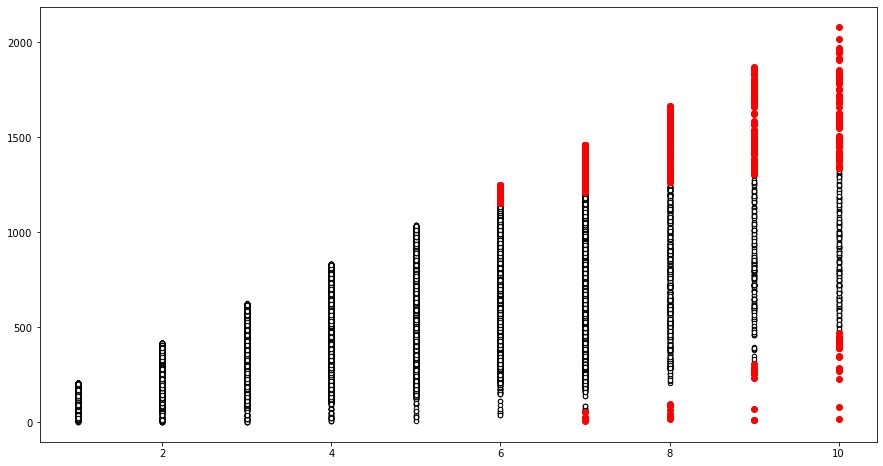

In [14]:
from sklearn.covariance import EllipticEnvelope

# create new features: total price and total nights
cleaned.loc[:, 'total_nights'] = \
cleaned['stays_in_week_nights'] + cleaned['stays_in_weekend_nights']
cleaned.loc[:, 'price'] = cleaned['adr'] * cleaned['total_nights']
# create numpy array
X = np.array(cleaned[['total_nights', 'price']])
# create model 
ee = EllipticEnvelope(contamination=.01, random_state=0)
# predictions 
y_pred_ee = ee.fit_predict(X)
# predictions (-1: outlier, 1: normal)
anomalies = X[y_pred_ee == -1]
# plot data and outliers
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red');

In [15]:
X=booking1.drop(['is_canceled'],axis=1)
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2,7,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,999.0,999.0,0,Transient,75.00,0,0,Check-Out
3,13,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,304.0,999.0,0,Transient,75.00,0,0,Check-Out
4,14,2015,July,27,1,0,2,2,0.0,0,...,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out
5,14,2015,July,27,1,0,2,2,0.0,0,...,0,No Deposit,240.0,999.0,0,Transient,98.00,0,1,Check-Out
6,0,2015,July,27,1,0,2,2,0.0,0,...,0,No Deposit,999.0,999.0,0,Transient,107.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,August,35,30,2,5,2,0.0,0,...,0,No Deposit,394.0,999.0,0,Transient,96.14,0,0,Check-Out
119386,102,2017,August,35,31,2,5,3,0.0,0,...,0,No Deposit,9.0,999.0,0,Transient,225.43,0,2,Check-Out
119387,34,2017,August,35,31,2,5,2,0.0,0,...,0,No Deposit,9.0,999.0,0,Transient,157.71,0,4,Check-Out
119388,109,2017,August,35,31,2,5,2,0.0,0,...,0,No Deposit,89.0,999.0,0,Transient,104.40,0,0,Check-Out


In [16]:
y=booking1[['is_canceled']]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [18]:
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
73637,41,2017,August,35,28,3,9,1,0.0,0,...,0,No Deposit,9.0,999.0,0,Transient,161.83,0,0,Canceled
12403,104,2017,June,26,27,0,5,2,0.0,0,...,0,No Deposit,999.0,999.0,0,Transient,121.00,0,1,Canceled
31633,0,2017,January,1,1,1,0,3,0.0,0,...,0,No Deposit,999.0,999.0,0,Transient,111.00,0,0,Check-Out
67340,201,2017,May,18,1,3,5,3,0.0,0,...,0,No Deposit,9.0,999.0,0,Transient,149.40,0,1,Canceled
110571,145,2017,April,17,25,0,4,2,0.0,0,...,0,No Deposit,14.0,999.0,0,Transient,99.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51459,211,2016,May,21,20,0,2,2,0.0,0,...,0,Non Refund,6.0,999.0,111,Transient,100.00,0,0,Canceled
100191,386,2016,October,44,23,2,0,2,0.0,0,...,0,No Deposit,6.0,999.0,0,Transient-Party,115.00,0,1,Check-Out
5327,138,2016,April,18,25,1,2,2,0.0,0,...,0,Non Refund,999.0,999.0,0,Transient,65.00,0,0,Canceled
79365,11,2015,October,44,30,1,2,2,0.0,0,...,0,No Deposit,9.0,999.0,0,Contract,113.33,0,1,Canceled


In [19]:
X_train['is_canceled']=y_train

C:\Users\sriya\AppData\Local\Temp/ipykernel_14028/78758125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['is_canceled']=y_train


In [20]:
train=X_train

In [21]:
X_test['is_canceled']=y_test

C:\Users\sriya\AppData\Local\Temp/ipykernel_14028/3809351434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['is_canceled']=y_test


In [22]:
test=X_test


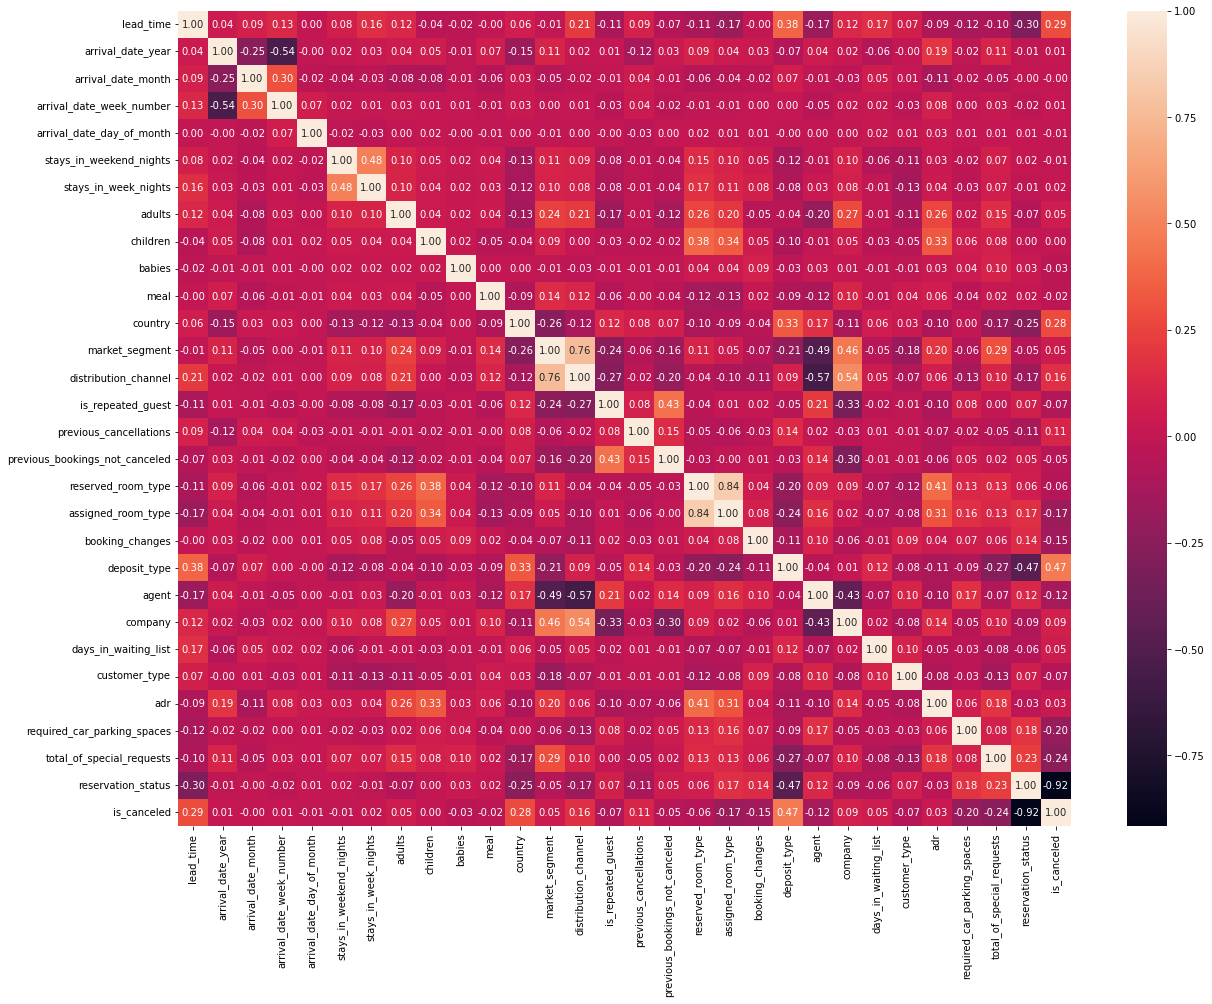

In [23]:
from sklearn.preprocessing import LabelEncoder
df_le = train.copy()
le = LabelEncoder()

categoricals = [
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
]

for col in categoricals:
    df_le[col] = le.fit_transform(df_le[col])
plt.figure(figsize=(20, 15))
sns.heatmap(df_le.corr(), annot=True, fmt='.2f');

In [24]:
columns = [
    'reservation_status',
]

train = train.drop(columns, axis=1)
test = test.drop(columns, axis=1)
df_le = df_le.drop(columns, axis=1)

In [25]:
new_categoricals = [col for col in categoricals if col in train.columns]
df_hot = pd.get_dummies(data=train, columns=new_categoricals)
test_hot = pd.get_dummies(data=test, columns=new_categoricals)
X_hot = df_hot.drop('is_canceled', axis=1)
X_le = df_le.drop('is_canceled', axis=1)
y = train['is_canceled']

In [26]:
new_categoricals

['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type']

In [27]:
X_hot

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,company_530.0,company_531.0,company_539.0,company_541.0,company_543.0,company_999.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
73637,41,2017,35,28,3,9,1,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
12403,104,2017,26,27,0,5,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
31633,0,2017,1,1,1,0,3,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
67340,201,2017,18,1,3,5,3,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
110571,145,2017,17,25,0,4,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51459,211,2016,21,20,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
100191,386,2016,44,23,2,0,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
5327,138,2016,18,25,1,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
79365,11,2015,44,30,1,2,2,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_hot, y, test_size=.2, random_state=1)
log = LogisticRegression().fit(X_train, y_train)
y_pred = log.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7999316005471956
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     10938
           1       0.79      0.64      0.71      6606

    accuracy                           0.80     17544
   macro avg       0.80      0.77      0.78     17544
weighted avg       0.80      0.80      0.79     17544



C:\Users\sriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
accuracy_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined